# Esercitazione 6
Vanno ancora risistemati

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color_palette = sns.color_palette("bright")

points=100
T = np.linspace(0.3,2.0,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th

## Energia interna

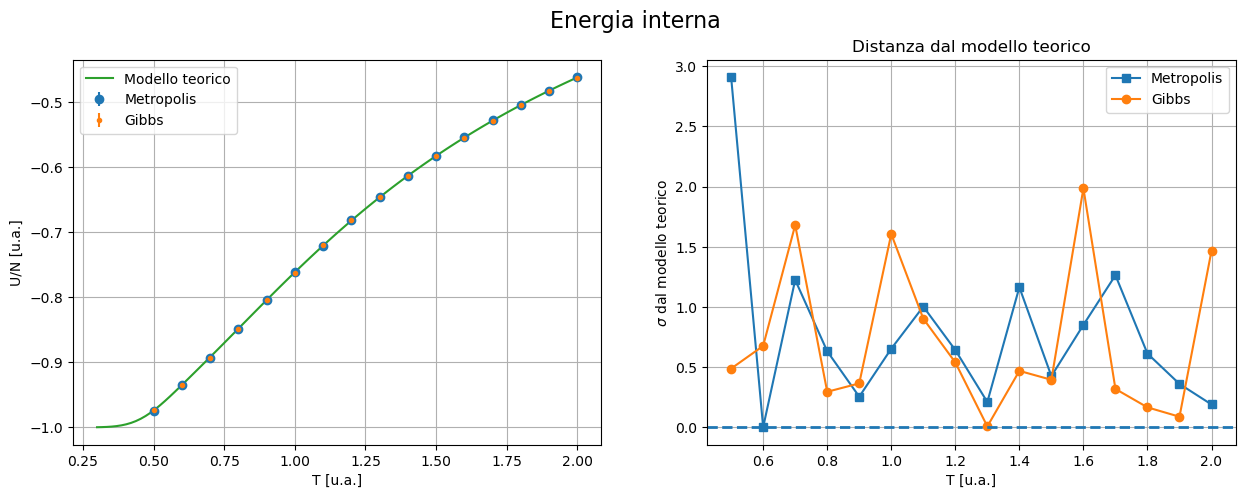

In [18]:
e = -J*( th + ch*thN )/( 1 + thN )
x, sum41, error = np.loadtxt("risultati/METRO/final.ene", usecols=(0,1,2), unpack='true')
x2, sum42, error2 = np.loadtxt("risultati/GIBBS/final.ene", usecols=(0,1,2), unpack='true')

betax = 1/x
thx = np.tanh(J/x)
thNx= thx**Ns
chx = 1/thx

ex = -J*( thx + chx*thNx )/( 1 + thNx )
diffM = abs(sum41-ex)/error
diffG = abs(sum42-ex)/error2 

fig, [ax0, ax1] = plt.subplots(1, 2, figsize=(15,5))

fig.suptitle("Energia interna", size=16)

ax0.errorbar(x,sum41,yerr=error,marker='o', linestyle='none', label='Metropolis')
ax0.errorbar(x,sum42,yerr=error2,marker='.', linestyle='none', label='Gibbs')
ax0.plot(T, e,label='Modello teorico' )
ax0.set_xlabel('T [u.a.]')
ax0.set_ylabel('U/N [u.a.]')
ax0.grid(True)
ax0.legend()

ax1.plot(x, diffM, marker='s', label='Metropolis')
ax1.plot(x2, diffG, marker='o',  label='Gibbs')
ax1.axhline(y=0, ls='--', lw=2)
ax1.set_title("Distanza dal modello teorico")
ax1.set_xlabel('T [u.a.]')
ax1.set_ylabel("$\sigma$ dal modello teorico")
ax1.grid(True)
ax1.legend()

plt.show()

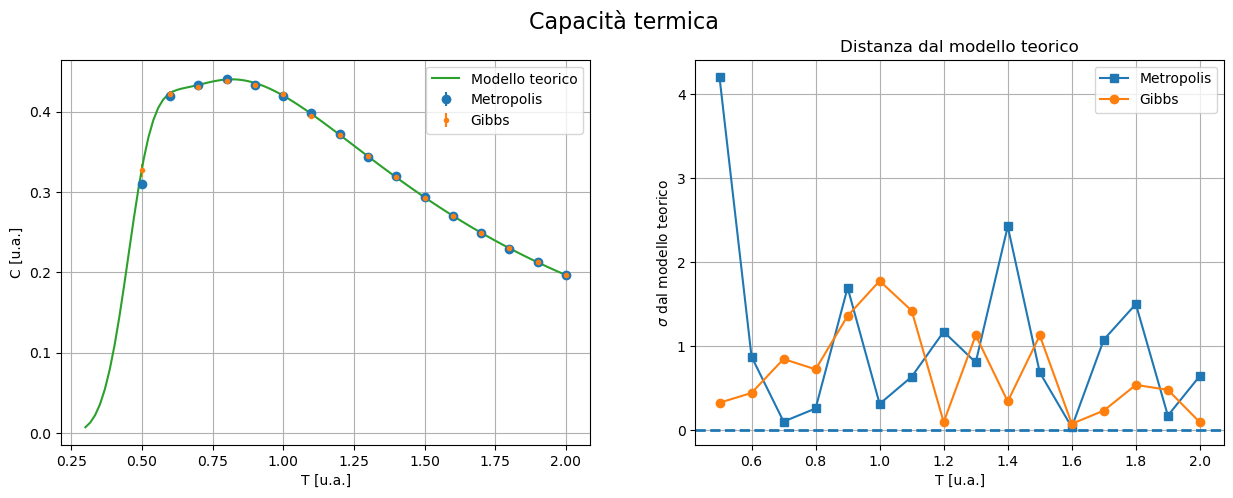

In [21]:
heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)
x, sum41, error = np.loadtxt("risultati/METRO/final.heat", usecols=(0,1,2), unpack='true')
x2, sum42, error2 = np.loadtxt("risultati/GIBBS/final.heat", usecols=(0,1,2), unpack='true')

heatx=((betax*J)**2)*(((1+thNx+(Ns-1)*(thx**2)+(Ns-1)*(chx**2)*thNx)/(1+thNx))-Ns*((thx+chx*thNx)/(1+thNx))**2)
diffM = abs(sum41-heatx)/error
diffG = abs(sum42-heatx)/error2 

fig, [ax0, ax1] = plt.subplots(1, 2, figsize=(15,5))

fig.suptitle("Capacità termica", size=16)

ax0.errorbar(x,sum41,yerr=error,marker='o', linestyle='none', label='Metropolis')
ax0.errorbar(x,sum42,yerr=error2,marker='.', linestyle='none', label='Gibbs')
ax0.plot(T, heat,label='Modello teorico' )
ax0.set_xlabel('T [u.a.]')
ax0.set_ylabel('C [u.a.]')
ax0.grid(True)
ax0.legend()

ax1.plot(x, diffM, marker='s', label='Metropolis')
ax1.plot(x2, diffG, marker='o',  label='Gibbs')
ax1.axhline(y=0, ls='--', lw=2)
ax1.set_title("Distanza dal modello teorico")
ax1.set_xlabel('T [u.a.]')
ax1.set_ylabel("$\sigma$ dal modello teorico")
ax1.grid(True)
ax1.legend()

plt.show()

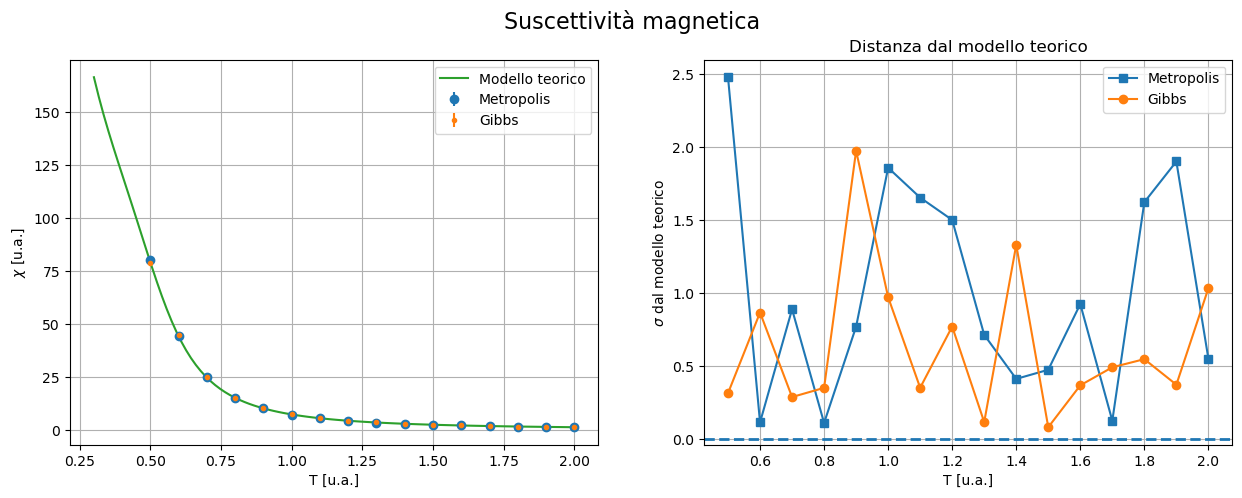

In [23]:
X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)
x, sum41, error = np.loadtxt("risultati/METRO/final.chi", usecols=(0,1,2), unpack='true')
x2, sum42, error2 = np.loadtxt("risultati/GIBBS/final.chi", usecols=(0,1,2), unpack='true')

Xx = betax*np.exp(2*betax*J)*(1-thNx)/(1+thNx)
diffM = abs(sum41-Xx)/error
diffG = abs(sum42-Xx)/error2 

fig, [ax0, ax1] = plt.subplots(1, 2, figsize=(15,5))

fig.suptitle("Suscettività magnetica", size=16)

ax0.errorbar(x,sum41,yerr=error,marker='o', linestyle='none', label='Metropolis')
ax0.errorbar(x,sum42,yerr=error2,marker='.', linestyle='none', label='Gibbs')
ax0.plot(T, X,label='Modello teorico' )
ax0.set_xlabel('T [u.a.]')
ax0.set_ylabel('$\chi$ [u.a.]')
ax0.grid(True)
ax0.legend()

ax1.plot(x, diffM, marker='s', label='Metropolis')
ax1.plot(x2, diffG, marker='o',  label='Gibbs')
ax1.axhline(y=0, ls='--', lw=2)
ax1.set_title("Distanza dal modello teorico")
ax1.set_xlabel('T [u.a.]')
ax1.set_ylabel("$\sigma$ dal modello teorico")
ax1.grid(True)
ax1.legend()

plt.show()

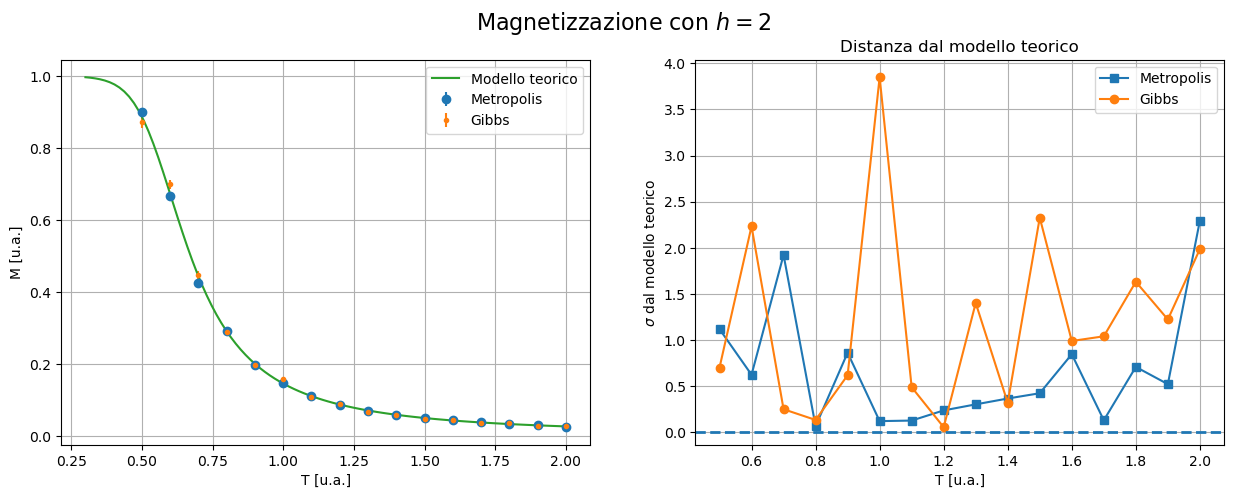

In [24]:
h=0.02 #external field
b = 1/T

l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)

x, sum41, error = np.loadtxt("risultati/METRO/final.mag", usecols=(0,1,2), unpack='true')
x2, sum42, error2 = np.loadtxt("risultati/GIBBS/final.mag", usecols=(0,1,2), unpack='true')

bx=1/x
l1x = np.exp(bx*J)*np.cosh(bx*h)+np.sqrt(np.exp(2*bx*J)*np.cosh(bx*h)*np.cosh(bx*h)-2*np.sinh(2*bx*J))
l2x = np.exp(bx*J)*np.cosh(bx*h)-np.sqrt(np.exp(2*bx*J)*np.cosh(bx*h)*np.cosh(bx*h)-2*np.sinh(2*bx*J))
Zx = l1x**Ns + l2x**Ns
Mx = (np.exp(bx*J)*np.sinh(bx*h)*((l1x**(Ns-1))*(1+np.exp(bx*J)*np.cosh(bx*h)/np.sqrt(np.exp(2*bx*J)*np.cosh(bx*h)*np.cosh(bx*h)-2*np.sinh(2*bx*J))) 
        + (l2x**(Ns-1))*(1-np.exp(bx*J)*np.cosh(bx*h)/np.sqrt(np.exp(2*bx*J)*np.cosh(bx*h)*np.cosh(bx*h)-2*np.sinh(2*bx*J)))))/(Zx)
diffM = abs(sum41-Mx)/error
diffG = abs(sum42-Mx)/error2 

fig, [ax0, ax1] = plt.subplots(1, 2, figsize=(15,5))

fig.suptitle("Magnetizzazione con $h=2$", size=16)

ax0.errorbar(x,sum41,yerr=error,marker='o', linestyle='none', label='Metropolis')
ax0.errorbar(x,sum42,yerr=error2,marker='.', linestyle='none', label='Gibbs')
ax0.plot(T, M,label='Modello teorico' )
ax0.set_xlabel('T [u.a.]')
ax0.set_ylabel('M [u.a.]')
ax0.grid(True)
ax0.legend()

ax1.plot(x, diffM, marker='s', label='Metropolis')
ax1.plot(x2, diffG, marker='o',  label='Gibbs')
ax1.axhline(y=0, ls='--', lw=2)
ax1.set_title("Distanza dal modello teorico")
ax1.set_xlabel('T [u.a.]')
ax1.set_ylabel("$\sigma$ dal modello teorico")
ax1.grid(True)
ax1.legend()

plt.show()